# Importing Packages

In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose                      
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

## Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\Lohesh\Downloads\Notes\IOT\ts_data.csv")

In [3]:
df.head()

,Month,Production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       476 non-null    object 
 1   Production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [5]:
df.Month = pd.to_datetime(df.Month)

In [6]:
df = df.set_index("Month")
df.head()

,Production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [7]:
df.index.freq = 'MS'

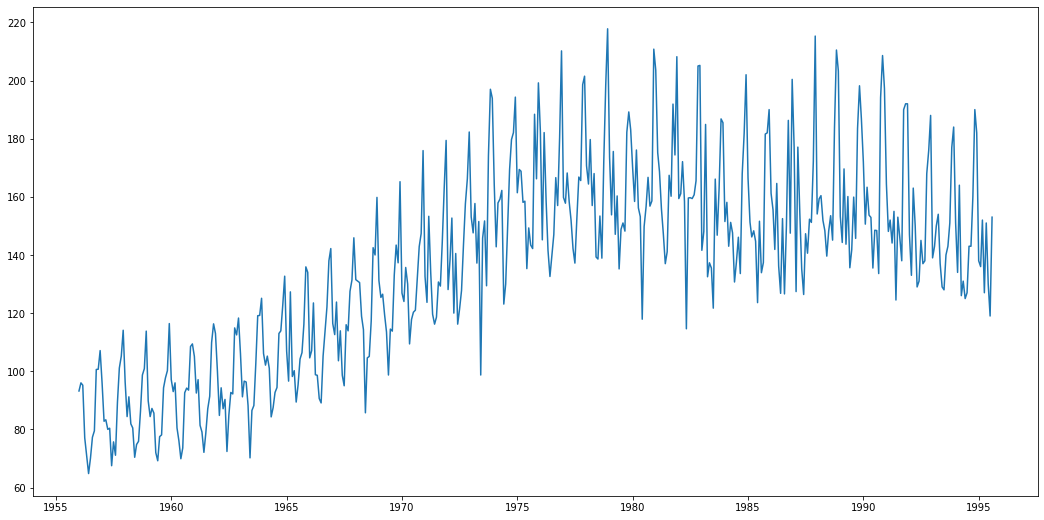

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Production"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Total Production')
plt.show();

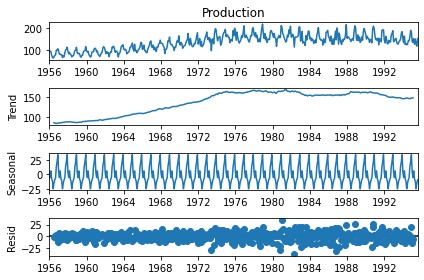

In [9]:
a = seasonal_decompose(df["Production"], model = "add")
a.plot();

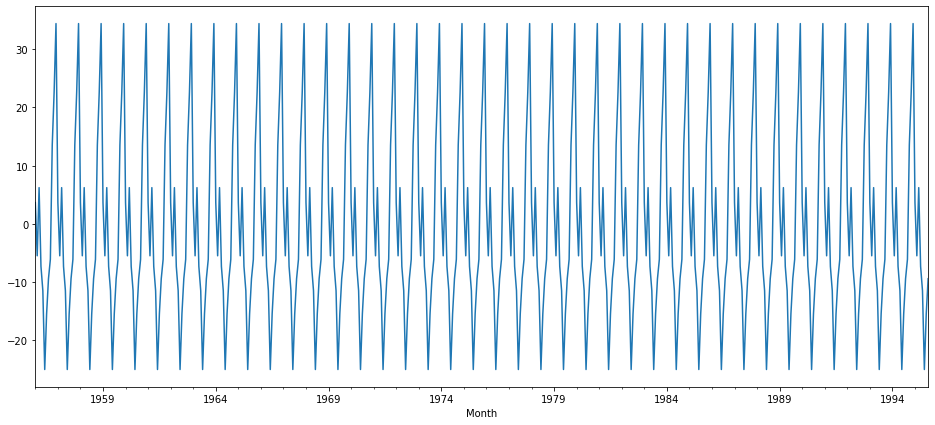

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

## ARIMA Forecast

In [11]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

In [12]:
arima_model = SARIMAX(train_data['Production'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                 Production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.996
Date:                                    Sun, 16 Apr 2023   AIC                           3437.991
Time:                                            20:45:21   BIC                           3483.506
Sample:                                        01-01-1956   HQIC                          3455.909
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1227      0.042     -2.929      0.003      -0.205      -0.041
ar.L2         -0.1703      0.045     -3.756      0.000      -0.259      -0.081
ma.L1         -0.8434      0.028    -30.312      0.000      -0.898      -0.789
ar.S.L12       1.7551      0.115     15.299      0.000       1.530       1.980
ar.S.L24      -1.6104      0.223     -7.208      0.000      -2.048      -1.173
ar.S.L36       0.7900      0.174      4.540      0.000       0.449       1.131
ar.S.L48       0.0641      0.060      1.064      0.287      -0.054       0.182
ma.S.L12      -1.5518      0.128    -12.158      0.000      -1.802      -1.302
ma.S.L24       1.3879      0.215      6.450      0.000       0.966       1.810
ma.S.L36      -0.6598      0.124     -5.299      0.000      -0.904      -0.416
sigma2        83.6711      4.903     17.065      0.000      74.061      93.281
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                41.10
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.977422
1994-10-01    157.709593
1994-11-01    181.879675
1994-12-01    183.542391
1995-01-01    144.867886
1995-02-01    136.869973
1995-03-01    151.188978
1995-04-01    133.161988
1995-05-01    137.962003
1995-06-01    120.548485
1995-07-01    128.386114
1995-08-01    138.853085
Freq: MS, Name: ARIMA Predictions, dtype: float64

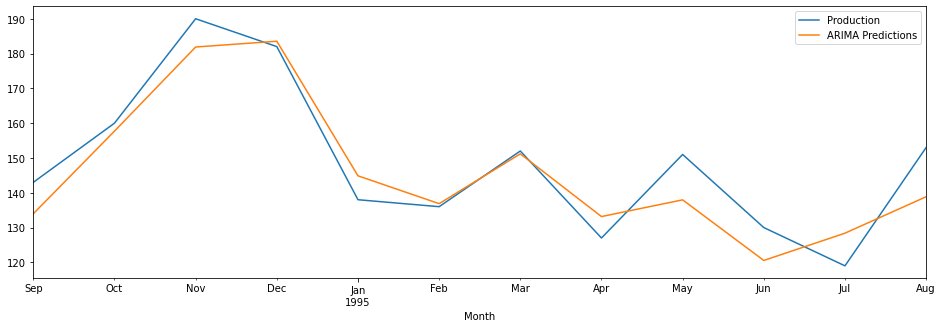

In [14]:
test_data['Production'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [15]:
arima_rmse_error = rmse(test_data['Production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Production'].mean()

In [16]:
test_data['ARIMA_Predictions'] = arima_pred